---
# <center>Clustering</center>
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
np.random.seed(1234)

In [2]:
def myscatter(data,assignment):
    sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)', 
                hue=assignment, 
                palette=sns.color_palette('Set1', as_cmap=True))

# Load the data

In [5]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#set index to field in the spreadsheet
data = data.set_index('CustomerID')
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
# Let's only keep 2 columns
X = data[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

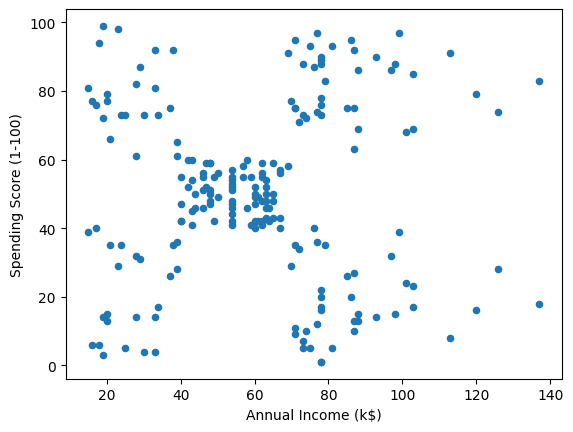

In [11]:
# Let's plot to take a look, note that we can already see "clusters"
X.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)')

# K-means

In [12]:
# Init = random means it uses random components from the data points to start
# verbose shows the iteration data shown below
kmeans = cluster.KMeans( n_clusters=5, init='random') #, verbose=1)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 99469.0.
Iteration 1, inertia 71736.3891834016.
Iteration 2, inertia 70888.37998445195.
Iteration 3, inertia 70860.62459954235.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 112152.0.
Iteration 1, inertia 74389.40436219951.
Iteration 2, inertia 69072.58073083413.
Iteration 3, inertia 66818.01099948955.
Iteration 4, inertia 66790.25561457993.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 181015.0.
Iteration 1, inertia 84998.27618001173.
Iteration 2, inertia 54501.904604901196.
Iteration 3, inertia 46820.71614446578.
Iteration 4, inertia 44917.08619298227.
Iteration 5, inertia 44474.83570937373.
Iteration 6, inertia 44448.45544793371.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 200379.0.
Iteration 1, inertia 83359.45978331692.
Iteration 2, inertia 73428.81491325662.
Iteration 3, inertia 66965.31487727376.
Ite

KMeans(init='random', n_clusters=5, verbose=1)

In [13]:
# This shows you what cluster each data point has been assigned to
kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

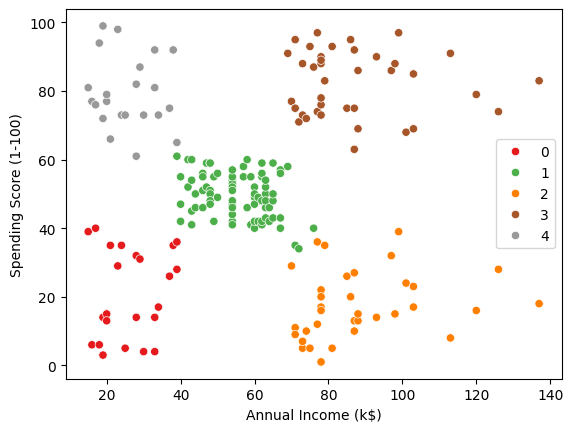

In [14]:
# Note that we're using the function we made at the top of the page here
myscatter(data, kmeans.labels_)

# Improved initialization: kmeans++

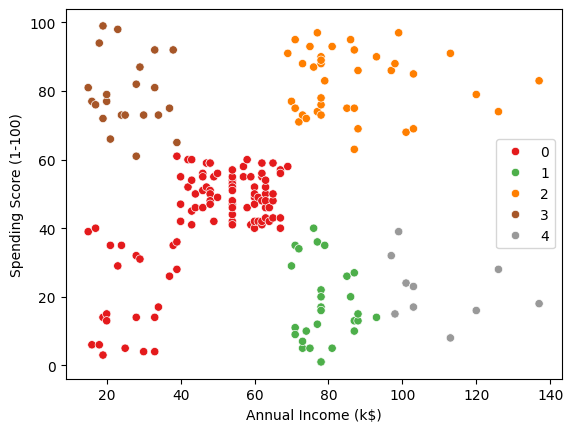

In [22]:
# Use k-means++ to initialize our centroids
# This method makes sure the initial points are spaced out, and is generally better than random
# The default setting is k-means++
kmeans = cluster.KMeans(n_clusters=5, init='k-means++').fit(X)
myscatter(data, kmeans.labels_)

# DBSCAN:
## Density-Based Spatial Clustering of Applications with Noise


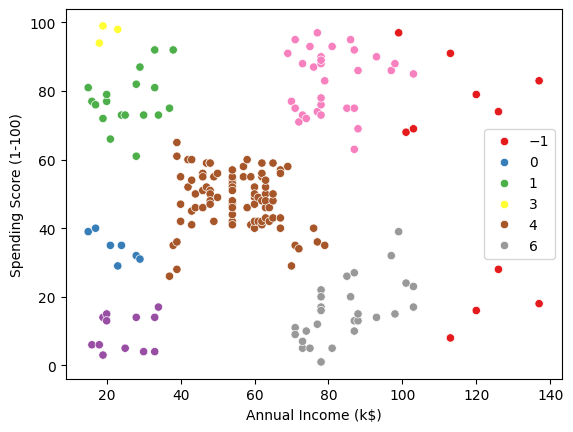

In [17]:
dbscan = cluster.DBSCAN(eps=9, min_samples=3).fit(X)
myscatter(data, dbscan.labels_)

# Prediction

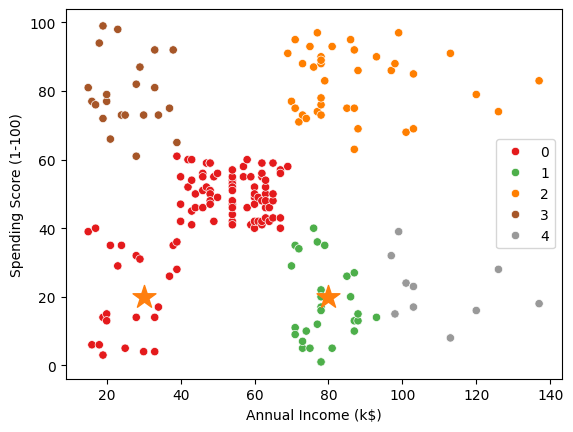

In [23]:
# If we want to add two new data points and predict which group they would be in
# Only k-means can do this. DBSCAN cannot
Xnew = np.array([[30,20],[80,20]])
myscatter(data, kmeans.labels_)
plt.scatter(Xnew[:,0],Xnew[:,1],marker='*',s=300)

In [24]:
# This tells you which clusters the new data units would likely be in
kmeans.predict(Xnew)

c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 1])